## Dataset Overview

The MPG dataset contains technical specifications of various automobiles, originally sourced from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/auto+mpg). It focuses on analyzing fuel efficiency, measured in miles per gallon (MPG), using a combination of three categorical and five numerical features.

---

## Column Descriptions

1. `mpg`: Fuel efficiency in miles per gallon (continuous).
2. `cylinders`: Number of engine cylinders (categorical, multi-valued).
3. `displacement`: Engine displacement size (continuous).
4. `horsepower`: Engine output power (continuous).
5. `weight`: Vehicle weight (continuous).
6. `acceleration`: Time taken to accelerate per second (continuous).
7. `model year`: Release year of the car, ranging from 1970 to 1982 (categorical, multi-valued).
8. `origin`: Region of manufacture (1 = USA, 2 = Europe, 3 = Asia) (categorical, multi-valued).
9. `car name`: Specific name of the car model (unique identifier for each record).


# Import Libraries


In [1]:
# importing lib.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Exploring


In [3]:
# loading the mpg dataset from the filepath
mpg_filepath = "auto-mpg.csv"
mpg_df = pd.read_csv(r'C:\2025\BA  - 2025\Project and Workshop\Python_MPG_Auto\MPG Auto\auto-mpg.csv')

In [4]:
mpg_df.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [5]:
mpg_df.tail(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
397,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10


In [6]:
mpg_df.duplicated().sum()

np.int64(0)

In [7]:
mpg_df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       94
weight          351
acceleration     95
model year       13
origin            3
car name        305
dtype: int64

In [8]:
mpg_df.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [9]:
(mpg_df["horsepower"] == "?").sum()

np.int64(6)

It seems like we have 6 values in horsepower column containing "?"


# Exploring Summary

- Total records
- No NaN values
- No duplicated rows
- horsepower column has inconsistent values


# Data Cleaning


In [10]:
# droping '?' values
mpg_df = mpg_df[mpg_df.horsepower != "?"]

# confirming changes
(mpg_df.horsepower == "?").sum()

np.int64(0)

In [10]:
# casting horsepower column to integer
mpg_df.horsepower = mpg_df.horsepower.astype(int)

# confirming changes
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 30.6+ KB


In [12]:
# parsing origin column
mpg_df.loc[mpg_df.origin == 1, "origin"] = "USA"
mpg_df.loc[mpg_df.origin == 2, "origin"] = "Europe"
mpg_df.loc[mpg_df.origin == 3, "origin"] = "Asia"

# casting origin column into category
mpg_df["origin"] = mpg_df["origin"].astype("category")

# validating changes
mpg_df["origin"].dtype

CategoricalDtype(categories=['Asia', 'Europe', 'USA'], ordered=False, categories_dtype=object)

# Data Visualization


In [12]:
# summary statistics

mpg_df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


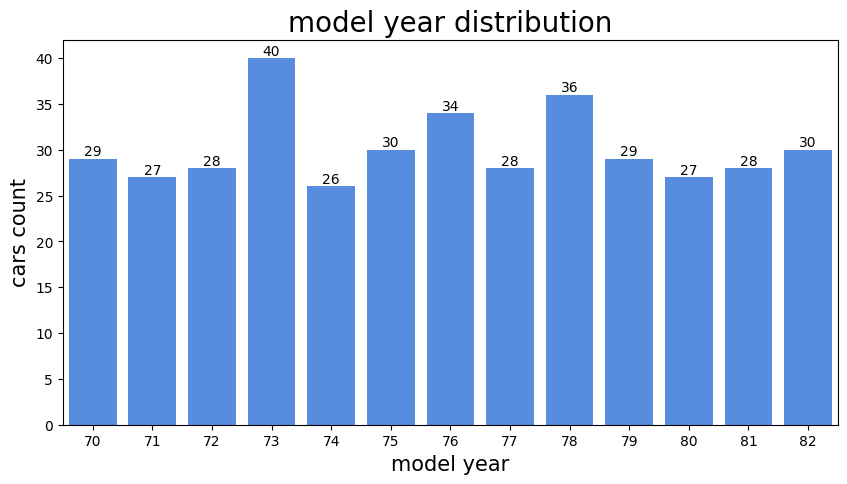

In [13]:
# displaying histgram of model year column
plt.figure(figsize=(10, 5))
ax = sns.countplot(x="model year", data=mpg_df, color="#4287f5")
ax.bar_label(ax.containers[0], label_type="edge")
plt.title("model year distribution", fontsize=20)
plt.xlabel("model year", fontsize=15)
plt.ylabel("cars count", fontsize=15)
plt.show()

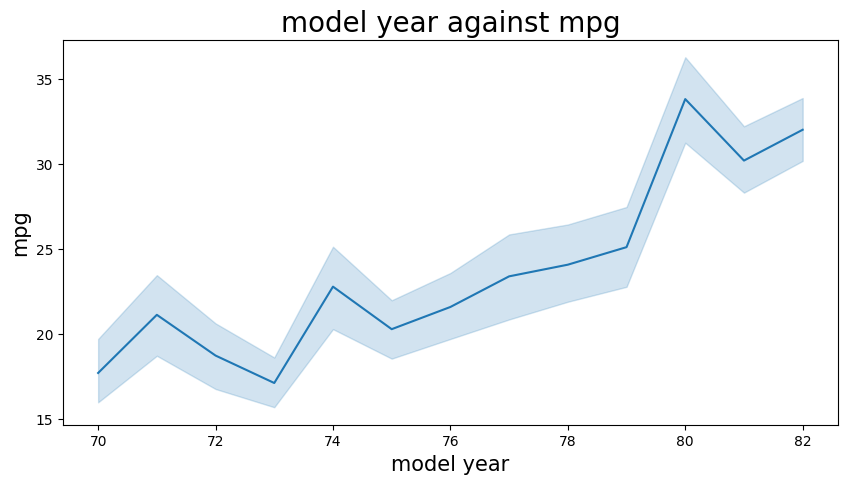

In [14]:
# ploting model year against mpg
plt.figure(figsize=(10, 5))
plt.title("model year against mpg", fontsize=20)
plt.xlabel("model year", fontsize=15)
plt.ylabel("mpg", fontsize=15)
sns.lineplot(x="model year", y="mpg", data=mpg_df);

- Cars are produced the most in 1973
- mpg increases as years pass


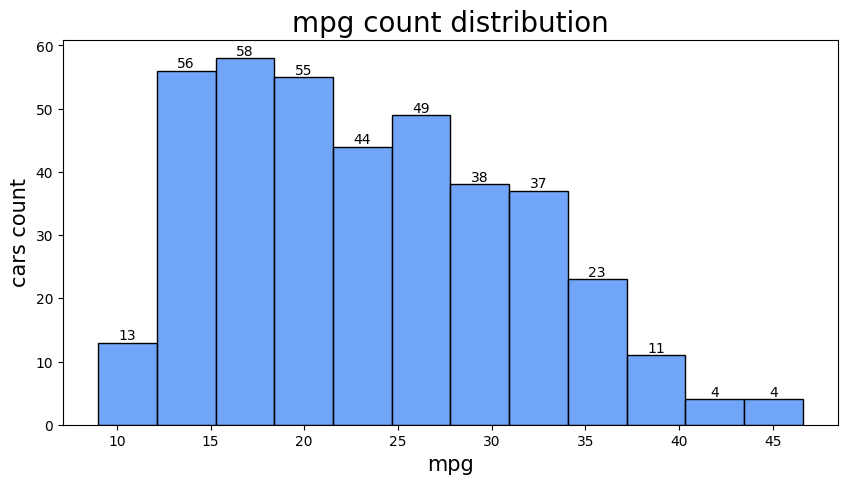

In [15]:
# ploting mpg distribution
plt.figure(figsize=(10, 5))
ax = sns.histplot(x="mpg", data=mpg_df, color="#4287f5")
ax.bar_label(ax.containers[0], label_type="edge")
plt.title("mpg count distribution", fontsize=20)
plt.xlabel("mpg", fontsize=15)
plt.ylabel("cars count", fontsize=15)
plt.show()

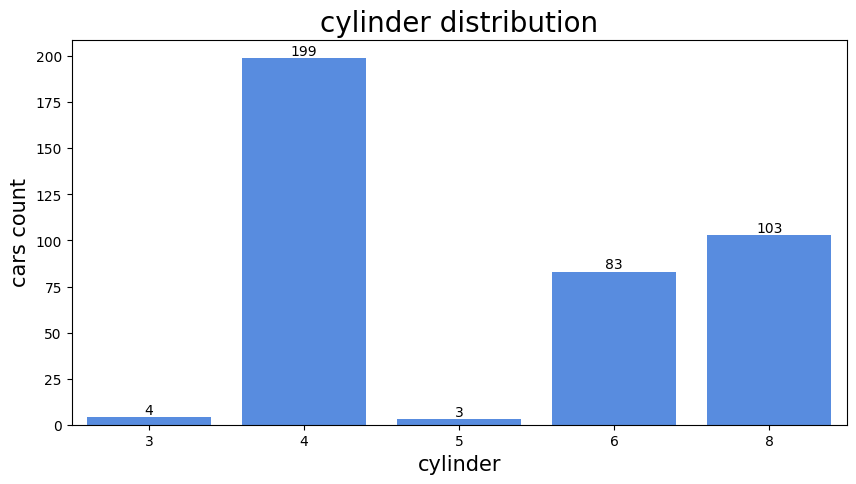

In [16]:
# displaying cylinder column distribution
plt.figure(figsize=(10, 5))
ax = sns.countplot(x="cylinders", data=mpg_df, color="#4287f5")
ax.bar_label(ax.containers[0], label_type="edge")
plt.title("cylinder distribution", fontsize=20)
plt.xlabel("cylinder", fontsize=15)
plt.ylabel("cars count", fontsize=15)
plt.show()

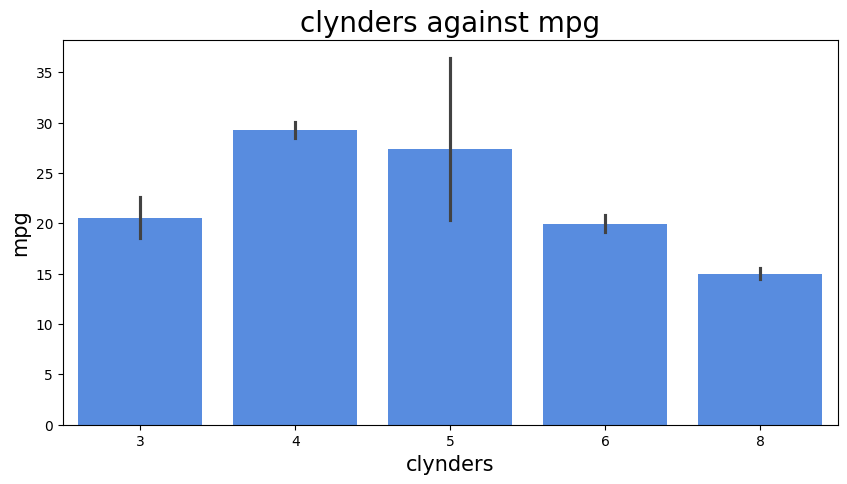

In [17]:
# ploting clynders against mpg
plt.figure(figsize=(10, 5))
sns.barplot(x="cylinders", y="mpg", data=mpg_df, color="#4287f5")
plt.title("clynders against mpg", fontsize=20)
plt.xlabel("clynders", fontsize=15)
plt.ylabel("mpg", fontsize=15)
plt.show()

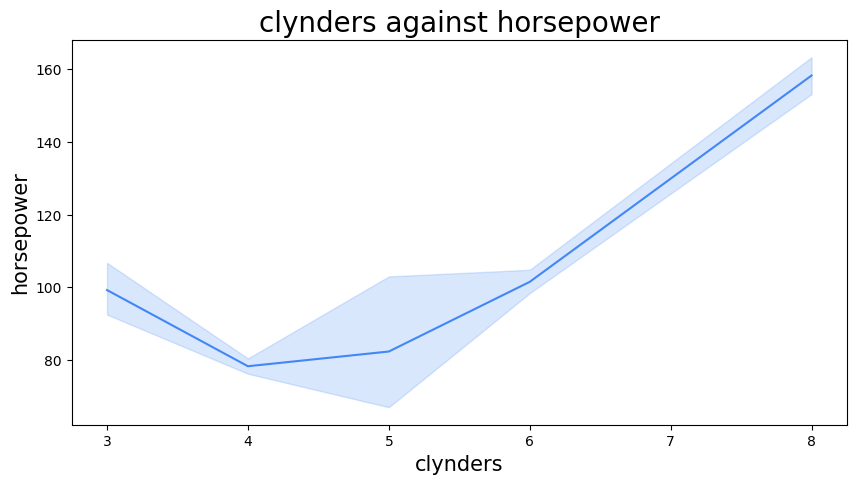

In [18]:
# ploting cylinders anainst horsepower
plt.figure(figsize=(10, 5))
sns.lineplot(x="cylinders", y="horsepower", data=mpg_df, color="#4287f5")
plt.title("clynders against horsepower", fontsize=20)
plt.xlabel("clynders", fontsize=15)
plt.ylabel("horsepower", fontsize=15)
plt.show()

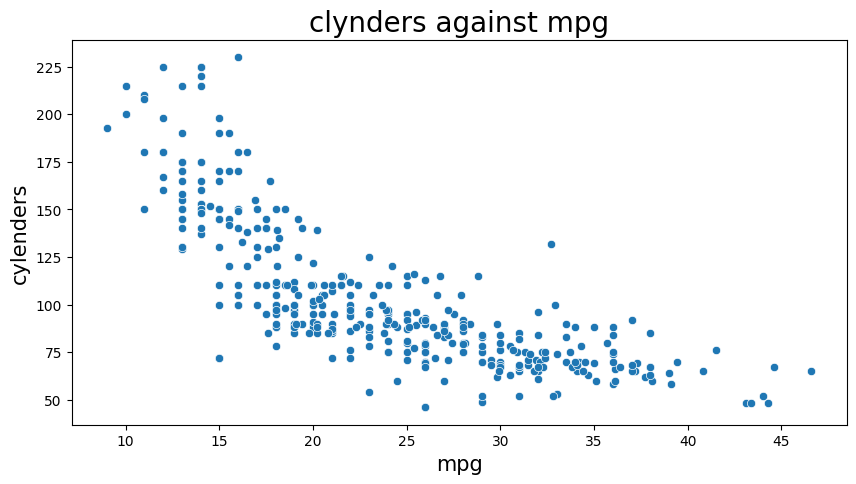

In [19]:
# ploting mpg against horsepower
plt.figure(figsize=(10, 5))
sns.scatterplot(x="mpg", y="horsepower", data=mpg_df)
plt.title("clynders against mpg", fontsize=20)
plt.xlabel("mpg", fontsize=15)
plt.ylabel("cylenders", fontsize=15)
plt.show()

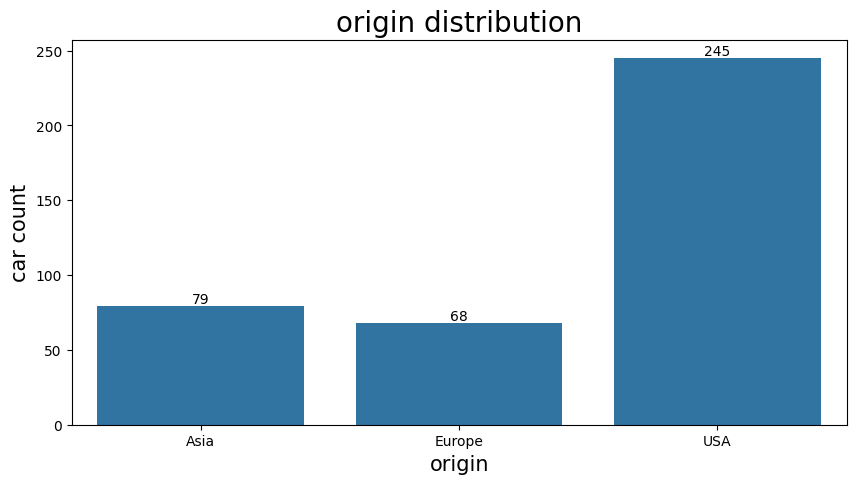

In [20]:
# ploting cars origin dist.
plt.figure(figsize=(10, 5))
ax = sns.countplot(x="origin", data=mpg_df)
ax.bar_label(ax.containers[0], label_type="edge")
plt.title("origin distribution", fontsize=20)
plt.xlabel("origin", fontsize=15)
plt.ylabel("car count", fontsize=15)
plt.show()

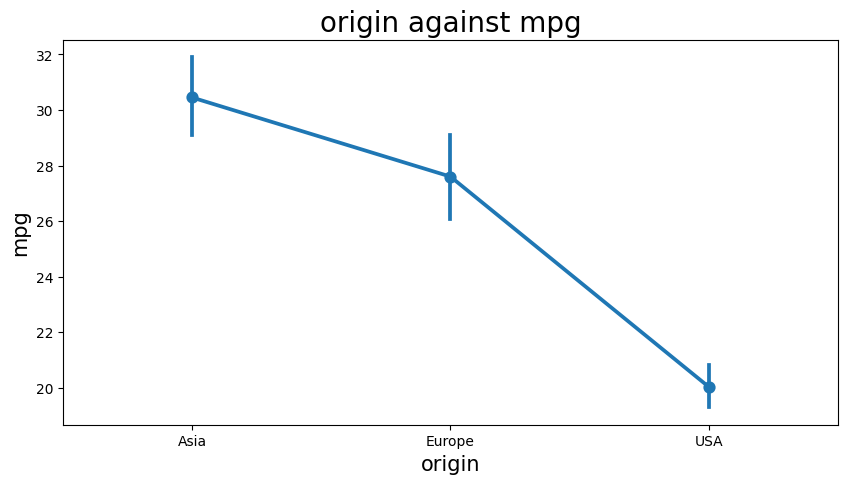

In [21]:
# ploting origin anainst mpg
plt.figure(figsize=(10, 5))
sns.pointplot(x="origin", y="mpg", data=mpg_df)
plt.title("origin against mpg", fontsize=20)
plt.xlabel("origin", fontsize=15)
plt.ylabel("mpg", fontsize=15)
plt.show()

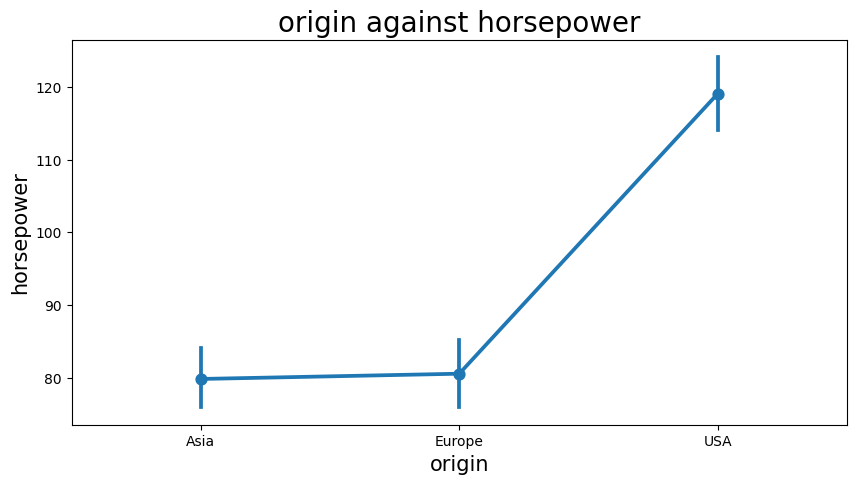

In [22]:
# ploting origin anainst horsepower
plt.figure(figsize=(10, 5))
sns.pointplot(x="origin", y="horsepower", data=mpg_df)
plt.title("origin against horsepower", fontsize=20)
plt.xlabel("origin", fontsize=15)
plt.ylabel("horsepower", fontsize=15)
plt.show()

C:\Users\nguye\AppData\Local\Temp\ipykernel_29688\448853695.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x="model year", y="mpg", hue="origin", data=mpg_df, ci=None)


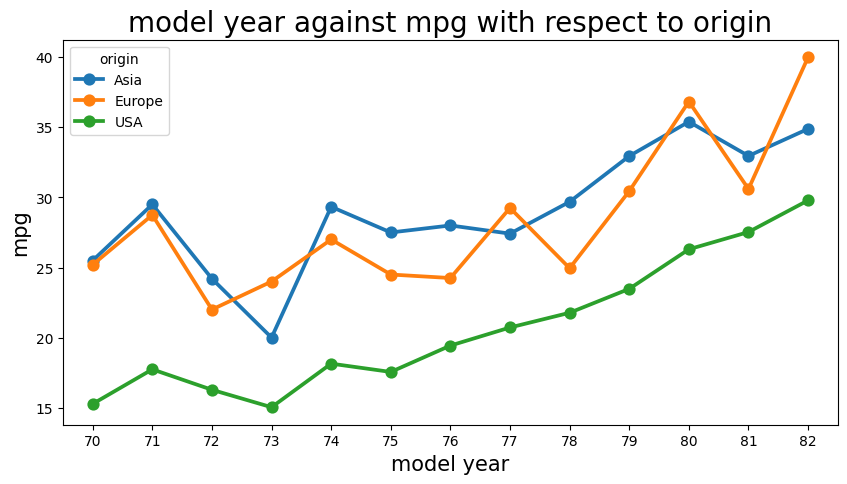

In [14]:
# display model year against mpg with respect to origin
plt.figure(figsize=(10, 5))
sns.pointplot(x="model year", y="mpg", hue="origin", data=mpg_df, ci=None)
plt.title("model year against mpg with respect to origin", fontsize=20)
plt.xlabel("model year", fontsize=15)
plt.ylabel("mpg", fontsize=15)
plt.show()

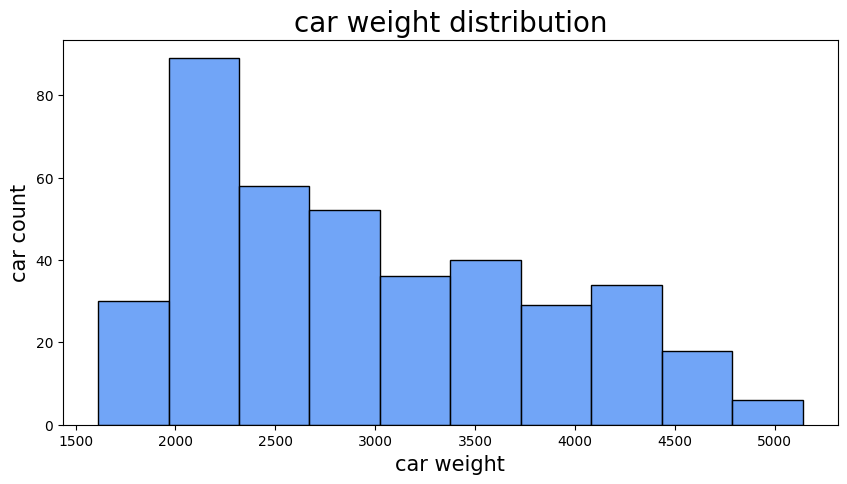

In [24]:
# plot a dist. of car weight
plt.figure(figsize=(10, 5))
sns.histplot(x="weight", data=mpg_df, color="#4287f5")
plt.title("car weight distribution", fontsize=20)
plt.xlabel("car weight", fontsize=15)
plt.ylabel("car count", fontsize=15)
plt.show()

C:\Users\nguye\AppData\Local\Temp\ipykernel_29688\3571544824.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x="model year", y="weight", data=mpg_df, color="#4287f5", ci=None)


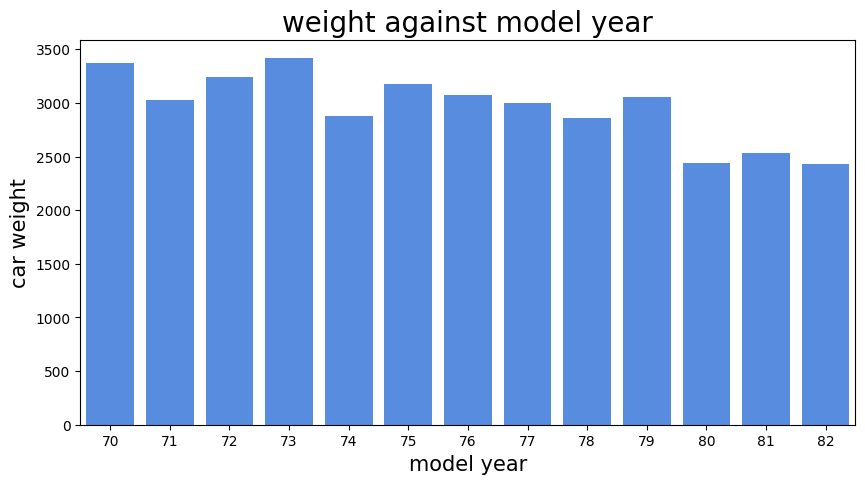

In [16]:
# plotting weight against model year
plt.figure(figsize=(10, 5))
ax = sns.barplot(x="model year", y="weight", data=mpg_df, color="#4287f5", ci=None)
plt.title("weight against model year", fontsize=20)
plt.xlabel("model year", fontsize=15)
plt.ylabel("car weight", fontsize=15)
plt.show()

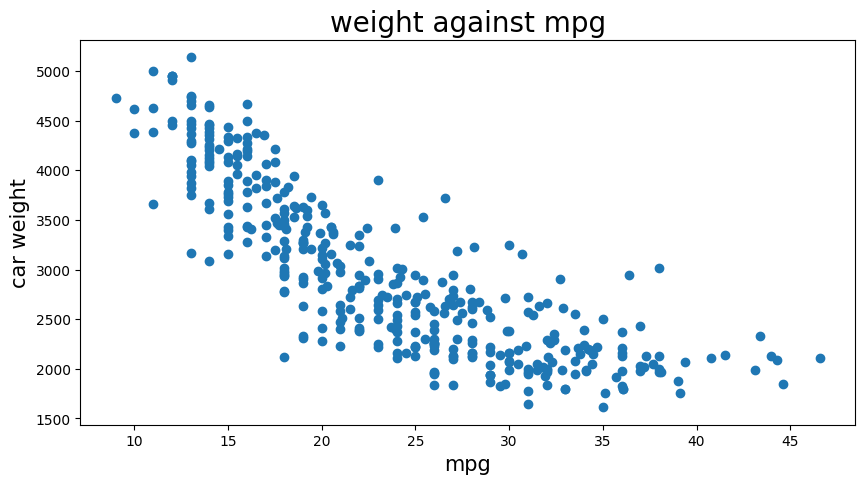

In [26]:
# plotting weight against mpg
plt.figure(figsize=(10, 5))
plt.scatter(x="mpg", y="weight", data=mpg_df)
plt.title("weight against mpg", fontsize=20)
plt.xlabel("mpg", fontsize=15)
plt.ylabel("car weight", fontsize=15)
plt.show()

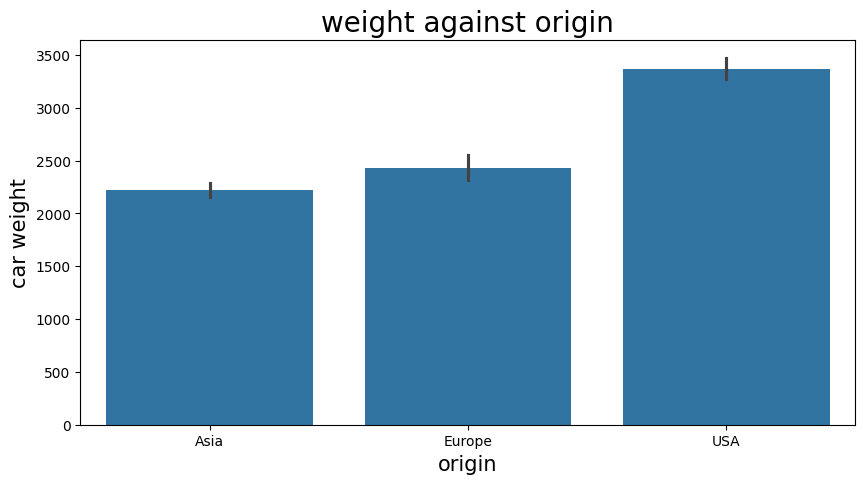

In [27]:
# plotting weight against origin
plt.figure(figsize=(10, 5))
sns.barplot(x="origin", y="weight", data=mpg_df)
plt.title("weight against origin", fontsize=20)
plt.xlabel("origin", fontsize=15)
plt.ylabel("car weight", fontsize=15)
plt.show()

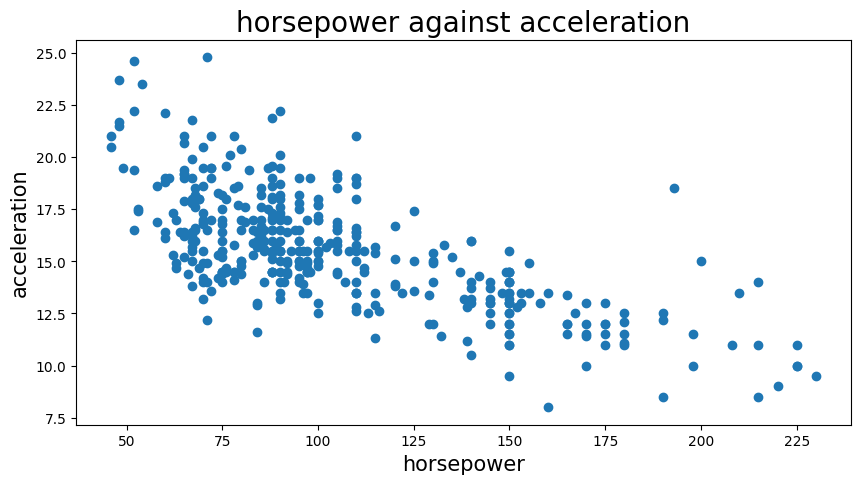

In [28]:
# plotting horsepower against acceleration
plt.figure(figsize=(10, 5))
plt.scatter(x="horsepower", y="acceleration", data=mpg_df)
plt.title("horsepower against acceleration", fontsize=20)
plt.xlabel("horsepower", fontsize=15)
plt.ylabel("acceleration", fontsize=15)
plt.show()